In [ ]:
# Start writing code here...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [ ]:
def explore_data(df):
    print("**** Dimensions or Shape (rows x columns)")
    display(df.shape)
    print("**** Column Names")
    display(df.columns)
    print("**** Data Types")
    display(df.dtypes)
    print("**** Descriptive Statistics")
    display(df.describe())
    print("**** Head")
    display(df.head())
    print("**** Null Checks")
    display(df.isnull().sum())


# Data Loading

In [ ]:
enrol_e = pd.read_csv("Enrollment Master Data_2015_E.csv")[:-1].astype(int)
enrol_s = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
)
masterlist = pd.read_csv("Masterlist of Schools.csv")
mooe = (pd.read_csv('MOOE data.csv', usecols=["school.id", " school.mooe "])
             .replace(",", "", regex=True).astype(float))
room = pd.read_csv('Rooms data.csv')
teacher = pd.read_csv("Teachers data.csv")


In [ ]:
masterlist['school.region'].value_counts()

Region VIII    4132
Region VI      4050
Region V       3798
Region VII     3737
Region III     3621
Region IV-A    3392
Region I       2926
Region II      2583
ARMM           2514
Region IX      2488
Region X       2441
Region IV-B    2198
Region XII     2168
CARAGA         2038
Region XI      1933
CAR            1816
NCR             768
Name: school.region, dtype: int64

In [ ]:
# replace CARAGA to REGION XIII
masterlist['school.region'] = masterlist['school.region'].str.replace('CARAGA','Region XIII')


In [ ]:
masterlist['school.region'].value_counts()

Region VIII    4132
Region VI      4050
Region V       3798
Region VII     3737
Region III     3621
Region IV-A    3392
Region I       2926
Region II      2583
ARMM           2514
Region IX      2488
Region X       2441
Region IV-B    2198
Region XII     2168
Region XIII    2038
Region XI      1933
CAR            1816
NCR             768
Name: school.region, dtype: int64

## Data cleaning

In [ ]:
enrol_all = pd.concat([enrol_e, enrol_s], ignore_index = True)

In [ ]:
enrol_all.columns

Index(['School ID', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Female', 'SPED NG Male',
       'SPED NG Female', 'Grade 7 Male', 'Grade 7 Female', 'Grade 8 Male',
       'Grade 8 Female', 'Grade 9 Male', 'Grade 9 Female', 'Grade 10 Male',
       'Grade 10 Female', 'Grade 11 Male', 'Grade 11 Female', 'Grade 12 Male',
       'Grade 12 Female'],
      dtype='object')

In [ ]:
masterlist.columns

Index(['school.id', 'school.name', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban'],
      dtype='object')

In [ ]:
masterlist.shape

(46603, 23)

In [ ]:
mooe.columns

Index(['school.id', ' school.mooe '], dtype='object')

In [ ]:
room.columns

Index(['School ID', 'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused'],
      dtype='object')

In [ ]:
teacher.columns

Index(['school.id', 'teachers.instructor', 'teachers.mobile',
       'teachers.regular', 'teachers.sped'],
      dtype='object')

In [ ]:
#School ID - enrol_all, room
#school.id - masterlist, mooe, teacher
master_df = pd.merge(masterlist, enrol_all, left_on ="school.id", right_on = "School ID", how = "left")

In [ ]:
master_df.head()

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female
0,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
master_df = pd.merge(master_df, mooe, on ="school.id", how = "left")

In [ ]:
master_df

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,school.mooe
0,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341000.0
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275000.0
2,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132000.0
3,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0
4,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46598,305308,Valeriano E. Fugoso Memorial High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAMPALOC,Sampaloc V,4th District,...,106.0,76.0,112.0,58.0,83.0,0.0,0.0,0.0,0.0,986000.0
46599,320402,Vicente Trinidad NHS (Punturin NHS),NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City Central District,1st District,...,275.0,265.0,267.0,239.0,234.0,0.0,0.0,0.0,0.0,1798000.0
46600,305315,Victoriano Mapa High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAN MIGUEL,Sta. Cruz V,6th District,...,532.0,412.0,457.0,401.0,441.0,0.0,0.0,0.0,0.0,3971000.0
46601,320407,Wawangpulo National High School,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City North District,1st District,...,54.0,80.0,58.0,55.0,44.0,0.0,0.0,0.0,0.0,539000.0


In [ ]:
master_df = pd.merge(master_df, room, left_on ="school.id", right_on = "School ID", how = "left")

In [ ]:
master_df

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,school.mooe,School ID_y,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused
0,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,NaN,NaN,NaN,NaN,341000.0,101746.0,15.0,0.0,0.0,0.0
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,NaN,NaN,NaN,NaN,275000.0,102193.0,13.0,3.0,0.0,0.0
2,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,NaN,NaN,NaN,NaN,132000.0,101283.0,7.0,0.0,0.0,0.0
3,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,NaN,NaN,NaN,NaN,135000.0,100216.0,6.0,0.0,0.0,0.0
4,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,NaN,NaN,NaN,NaN,182000.0,100043.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46598,305308,Valeriano E. Fugoso Memorial High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAMPALOC,Sampaloc V,4th District,...,0.0,0.0,0.0,0.0,986000.0,305308.0,17.0,0.0,0.0,0.0
46599,320402,Vicente Trinidad NHS (Punturin NHS),NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City Central District,1st District,...,0.0,0.0,0.0,0.0,1798000.0,320402.0,23.0,0.0,0.0,0.0
46600,305315,Victoriano Mapa High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAN MIGUEL,Sta. Cruz V,6th District,...,0.0,0.0,0.0,0.0,3971000.0,305315.0,39.0,0.0,0.0,0.0
46601,320407,Wawangpulo National High School,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City North District,1st District,...,0.0,0.0,0.0,0.0,539000.0,320407.0,11.0,0.0,0.0,0.0


In [ ]:
master_df = pd.merge(master_df, teacher, on ="school.id", how = "left")

In [ ]:
master_df

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,school.mooe,School ID_y,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped
0,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,341000.0,101746.0,15.0,0.0,0.0,0.0,0.0,1.0,20.0,0.0
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,275000.0,102193.0,13.0,3.0,0.0,0.0,0.0,2.0,12.0,4.0
2,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,132000.0,101283.0,7.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
3,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,135000.0,100216.0,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
4,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,182000.0,100043.0,9.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46598,305308,Valeriano E. Fugoso Memorial High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAMPALOC,Sampaloc V,4th District,...,986000.0,305308.0,17.0,0.0,0.0,0.0,0.0,7.0,39.0,0.0
46599,320402,Vicente Trinidad NHS (Punturin NHS),NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City Central District,1st District,...,1798000.0,320402.0,23.0,0.0,0.0,0.0,0.0,4.0,41.0,0.0
46600,305315,Victoriano Mapa High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAN MIGUEL,Sta. Cruz V,6th District,...,3971000.0,305315.0,39.0,0.0,0.0,0.0,0.0,27.0,164.0,0.0
46601,320407,Wawangpulo National High School,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City North District,1st District,...,539000.0,320407.0,11.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0


In [ ]:
master_df.columns

Index(['school.id', 'school.name', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'School ID_x', 'Kinder Male',
       'Kinder Female', 'Grade 1 Male', 'Grade 1 Female', 'Grade 2 Male',
       'Grade 2 Female', 'Grade 3 Male', 'Grade 3 Female', 'Grade 4 Male',
       'Grade 4 Female', 'Grade 5 Male', 'Grade 5 Female', 'Grade 6 Male',
       'Grade 6 Female', 'SPED NG Male', 'SPED NG Female', 'Grade 7 Male',
       'Grade 7 Female', 'Grade 8 Male', 'Grade 8 Female', 'Grade 9 Male',
       'Grade 9 Female', 'Grade 10 Male', 'Grade 10 Female', 'Grade 11 Male',
      

In [ ]:
master_df["MOOE"] = master_df[" school.mooe "]
master_df["MOOE"] = pd.to_numeric(master_df["MOOE"].replace(",", "", regex = True))
master_df.drop(["School ID_y", " school.mooe "], axis = 1)

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,Grade 12 Female,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,MOOE
0,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,NaN,15.0,0.0,0.0,0.0,0.0,1.0,20.0,0.0,341000.0
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,NaN,13.0,3.0,0.0,0.0,0.0,2.0,12.0,4.0,275000.0
2,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,NaN,7.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,132000.0
3,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,NaN,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,135000.0
4,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,NaN,9.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,182000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46598,305308,Valeriano E. Fugoso Memorial High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAMPALOC,Sampaloc V,4th District,...,0.0,17.0,0.0,0.0,0.0,0.0,7.0,39.0,0.0,986000.0
46599,320402,Vicente Trinidad NHS (Punturin NHS),NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City Central District,1st District,...,0.0,23.0,0.0,0.0,0.0,0.0,4.0,41.0,0.0,1798000.0
46600,305315,Victoriano Mapa High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAN MIGUEL,Sta. Cruz V,6th District,...,0.0,39.0,0.0,0.0,0.0,0.0,27.0,164.0,0.0,3971000.0
46601,320407,Wawangpulo National High School,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City North District,1st District,...,0.0,11.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,539000.0


In [ ]:
df_sped = master_df[(master_df["SPED NG Male"] > 0) | (master_df["SPED NG Female"] > 0)]

df_nosped = master_df[(master_df["SPED NG Male"] < 1) & (master_df["SPED NG Female"] < 1)]

In [ ]:
df_sped.shape

(1229, 63)

In [ ]:
df_sped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 1 to 46597
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   1229 non-null   int64  
 1   school.name                 1229 non-null   object 
 2   school.region               1229 non-null   object 
 3   school.region.name          1229 non-null   object 
 4   school.province             1229 non-null   object 
 5   school.cityhall             1229 non-null   object 
 6   school.division             1229 non-null   object 
 7   school.citymuni             1229 non-null   object 
 8   school.district             1229 non-null   object 
 9   school.legdistrict          1229 non-null   object 
 10  school.type                 1229 non-null   object 
 11  school.abbrev               660 non-null    object 
 12  school.previousname         1116 non-null   object 
 13  school.mother.id            1229

In [ ]:
#Number of Schools with SPED students per region
df_sped["school.region"].value_counts()

Region IV-A    174
NCR            135
Region VII     108
Region III     102
Region I        79
Region XI       76
Region IV-B     75
Region IX       73
Region VI       71
Region X        63
Region V        59
Region VIII     56
Region XIII     55
Region II       46
Region XII      41
CAR             14
ARMM             2
Name: school.region, dtype: int64

In [ ]:
#Number of SPED teachers per region
df_sped.groupby("school.region")["teachers.sped"].sum()

school.region
ARMM             0.0
CAR             54.0
NCR            355.0
Region I       110.0
Region II       49.0
Region III     130.0
Region IV-A    160.0
Region IV-B     76.0
Region IX      105.0
Region V        83.0
Region VI       89.0
Region VII     116.0
Region VIII     76.0
Region X        58.0
Region XI      103.0
Region XII      78.0
Region XIII     76.0
Name: teachers.sped, dtype: float64

In [ ]:
df_sped["school.urban"].value_counts()

Partially Urban    917
Urban              284
Rural               27
Name: school.urban, dtype: int64

In [ ]:
df_nonsped = master_df[(master_df["SPED NG Male"] == 0) & (master_df["SPED NG Female"] == 0) & (master_df["teachers.sped"] == 0)]

In [ ]:
df_nonsped.shape

(43615, 63)

In [ ]:
df_sped["MOOE"].sum()/master_df["MOOE"].sum()

0.0739644379928814

In [ ]:
#Insight: Of the total MOOE, only 8.48% is allocated to SPED schools

In [ ]:
#Possible clustering:
#We identify clusters based on demand and supply i.e. use teacher student ratios to identify schools with high demand of students and 

In [ ]:
enrol_all.head()

,School ID,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,...,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female
0,100001,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
enrol_all = enrol_all.fillna(0)

In [ ]:
mooe.head()

,school.id,school.mooe
0,305075.0,2182000.0
1,134966.0,227000.0
2,134967.0,144000.0
3,134968.0,339000.0
4,134969.0,178000.0


In [ ]:
mooe = mooe[["school.id", " school.mooe "]]

In [ ]:
df_sped

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,School ID_y,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,MOOE
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,102193.0,13.0,3.0,0.0,0.0,0.0,2.0,12.0,4.0,275000.0
7,102252,Abanon Central School,Region I,Ilocos Region,PANGASINAN,PANGASINAN,San Carlos City,SAN CARLOS CITY,San Carlos City District IV,3rd District,...,102252.0,24.0,0.0,0.0,0.0,0.0,4.0,22.0,1.0,440000.0
22,102226,Agdao Integrated School,Region I,Ilocos Region,PANGASINAN,PANGASINAN,San Carlos City,SAN CARLOS CITY,San Carlos City District II,3rd District,...,102226.0,20.0,0.0,0.0,0.0,0.0,4.0,20.0,1.0,381000.0
24,101132,Agno CS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",AGNO,Agno,1st District,...,101132.0,23.0,0.0,0.0,0.0,0.0,6.0,18.0,1.0,392000.0
29,101149,Aguilar CS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",AGUILAR,Aguilar,2nd District,...,101149.0,18.0,0.0,0.0,0.0,0.0,4.0,29.0,1.0,536000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46430,305443,Gen. T. de Leon NHS,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City East District,2nd District,...,305443.0,50.0,2.0,0.0,0.0,0.0,16.0,125.0,0.0,4542000.0
46440,319804,Jose Fabella Memorial School,NCR,National Capital Region,NCR SECOND DISTRICT,CITY OF MANDALUYONG,Mandaluyong City,CITY OF MANDALUYONG,Mandaluyong City District II,Lone District,...,319804.0,11.0,0.0,0.0,0.0,0.0,0.0,23.0,52.0,3628000.0
46496,305444,Maysan National High School,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City East District,2nd District,...,305444.0,26.0,1.0,0.0,0.0,0.0,9.0,54.0,0.0,1876000.0
46571,305446,Sitero Francisco Mem. NHS,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City Central District,2nd District,...,305446.0,16.0,0.0,0.0,0.0,0.0,3.0,39.0,0.0,1647000.0


In [ ]:
df_sped["school.id"].nunique()

1229

In [ ]:
master_df['school.name'].unique()

array(['A. Diaz, Sr. ES', 'A. P. Santos ES (SPED Center)',
       'A.P. Guevara IS', ..., 'Victoriano Mapa High School',
       'Wawangpulo National High School', 'Western Bicutan NHS'],
      dtype=object)

In [ ]:
len(master_df['school.name'].unique())

36901

## Feature Engineering

In [ ]:
df_sped["total_sped_students"] = df_sped["SPED NG Male"] + df_sped["SPED NG Female"]
df_sped["st_ratio"] = df_sped["total_sped_students"]/df_sped["teachers.sped"]
df_sped["st_ratio"]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1        13.500000
7         6.000000
22        7.000000
24       15.000000
29       21.000000
           ...    
46430          inf
46440     0.134615
46496          inf
46571          inf
46597    16.000000
Name: st_ratio, Length: 1229, dtype: float64

In [ ]:
df_sped["MOOE/student"] = df_sped["MOOE"]/df_sped["total_sped_students"]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_sped["MOOE/teacher"] = df_sped["MOOE"]/df_sped["teachers.sped"]
df_sped["MOOE/teacher"]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1        6.875000e+04
7        4.400000e+05
22       3.810000e+05
24       3.920000e+05
29       5.360000e+05
             ...     
46430             inf
46440    6.976923e+04
46496             inf
46571             inf
46597    2.924000e+06
Name: MOOE/teacher, Length: 1229, dtype: float64

In [ ]:
df_sped["total_rooms"] = df_sped["rooms.standard.academic"]+ df_sped['rooms.standard.unused'] + df_sped['rooms.nonstandard.academic'] + df_sped['rooms.nonstandard.unused']

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_sped["student/room"] = df_sped["total_sped_students"]/df_sped["total_rooms"]
df_sped["MOOE/room"] = df_sped["MOOE"]/df_sped["total_rooms"]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_sped[["st_ratio", "MOOE/student", "MOOE/teacher", "student/room", "MOOE/room"]]

,st_ratio,MOOE/student,MOOE/teacher,student/room,MOOE/room
1,13.500000,5092.592593,6.875000e+04,3.375000,17187.500000
7,6.000000,73333.333333,4.400000e+05,0.250000,18333.333333
22,7.000000,54428.571429,3.810000e+05,0.350000,19050.000000
24,15.000000,26133.333333,3.920000e+05,0.652174,17043.478261
29,21.000000,25523.809524,5.360000e+05,1.166667,29777.777778
...,...,...,...,...,...
46430,inf,84111.111111,inf,1.038462,87346.153846
46440,0.134615,518285.714286,6.976923e+04,0.636364,329818.181818
46496,inf,117250.000000,inf,0.592593,69481.481481
46571,inf,39214.285714,inf,2.625000,102937.500000


In [ ]:
df1 = df_sped.copy()
df1 =df1[df1['teachers.sp'] !=0]

In [ ]:
df1["total_sped_students"] = df1["SPED NG Male"] + df1["SPED NG Female"]
df1["st_ratio"] = df1["total_sped_students"]/df1["teachers.sped"]
df1["st_ratio"]



1        13.500000
7         6.000000
22        7.000000
24       15.000000
29       21.000000
           ...    
44497          NaN
44675     0.500000
45083     7.000000
46440     0.134615
46597    16.000000
Name: st_ratio, Length: 601, dtype: float64

Data Visualization

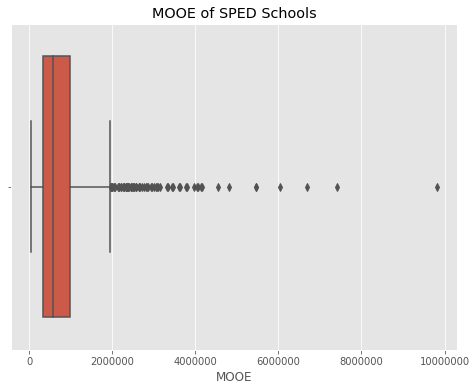

In [ ]:
plt.figure(figsize=(8,6))

box = sns.boxplot(x=df_sped["MOOE"])
box.ticklabel_format(style='plain', axis='x') # turned off scientific notation
plt.title("MOOE of SPED Schools")
plt.show()

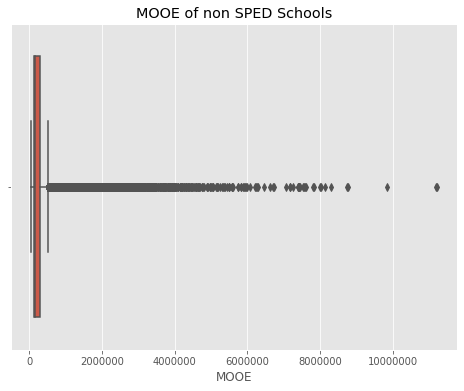

In [ ]:
plt.figure(figsize=(8,6))

box = sns.boxplot(x=df_nosped["MOOE"])
box.ticklabel_format(style='plain', axis='x')
plt.title("MOOE of non SPED Schools")
plt.show()

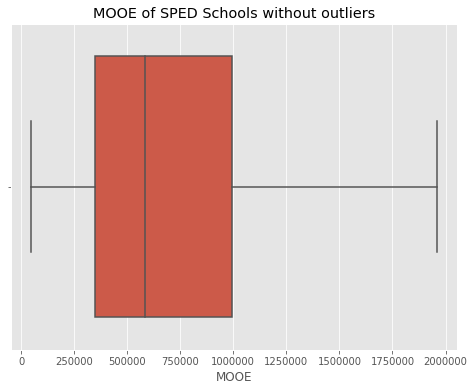

In [ ]:
plt.figure(figsize=(8,6))

box = sns.boxplot(x=df_sped["MOOE"], showfliers = False)
box.ticklabel_format(style='plain', axis='x') # turned off scientific notation
plt.title("MOOE of SPED Schools without outliers")
plt.show()



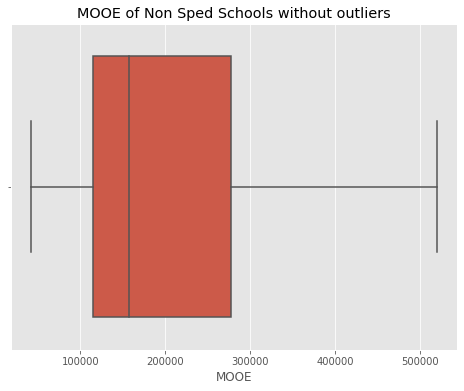

In [ ]:
plt.figure(figsize=(8,6))

box = sns.boxplot(x=df_nosped["MOOE"], showfliers = False)
box.ticklabel_format(style='plain', axis='x') # turned off scientific notation
plt.title("MOOE of Non Sped Schools without outliers")
plt.show()



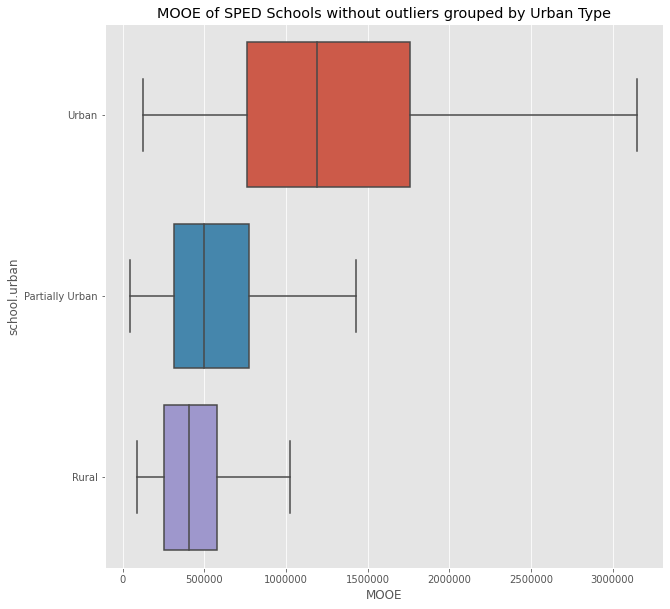

In [ ]:
plt.figure(figsize=(10,10))

box = sns.boxplot(x=df_sped["MOOE"], y=df_sped["school.urban"],order=["Urban", "Partially Urban", "Rural"], showfliers = False)
box.ticklabel_format(style='plain', axis='x') # turned off scientific notation
plt.title("MOOE of SPED Schools without outliers grouped by Urban Type")
plt.show()



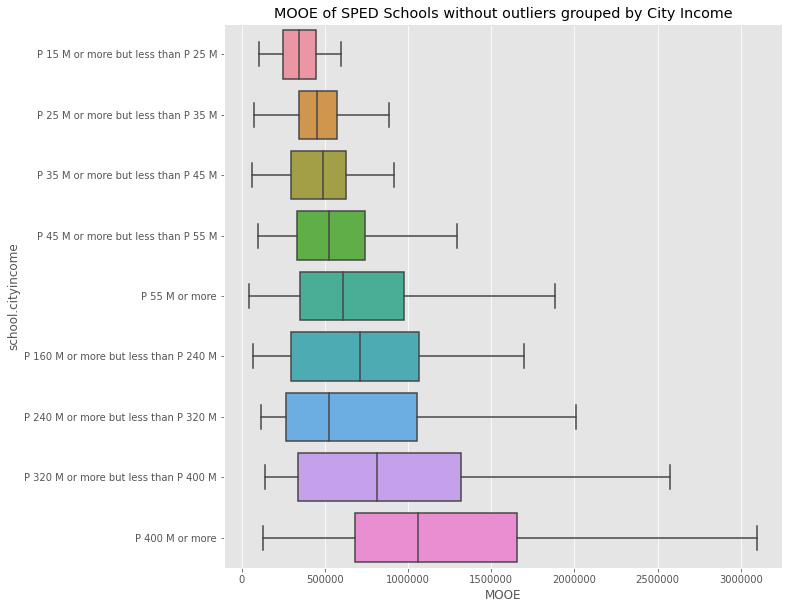

In [ ]:
df_spedincome = df_sped[(df_sped["school.cityincome"] != "Below P 15 M") & (df_sped["school.cityincome"] != "P 80 M or more but less than P 160 M") & (df_sped["school.cityincome"] != "Special Class")]


plt.figure(figsize=(10,10))

box = sns.boxplot(x=df_spedincome["MOOE"], y=df_spedincome["school.cityincome"], order=["P 15 M or more but less than P 25 M", "P 25 M or more but less than P 35 M", "P 35 M or more but less than P 45 M","P 45 M or more but less than P 55 M","P 55 M or more","P 160 M or more but less than P 240 M","P 240 M or more but less than P 320 M","P 320 M or more but less than P 400 M","P 400 M or more"], showfliers = False)
box.ticklabel_format(style='plain', axis='x') # turned off scientific notation
plt.title("MOOE of SPED Schools without outliers grouped by City Income")
plt.show()

#= master_df[(master_df["SPED NG Male"] == 0) & (master_df["SPED NG Female"] == 0) & (master_df["teachers.sped"] == 0)]



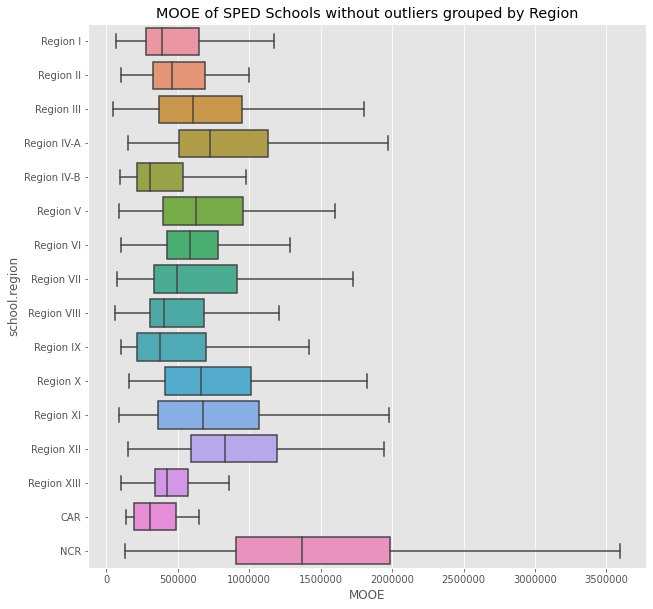

In [ ]:
df_region = df_sped[(df_sped["school.region"] != "ARMM")]


plt.figure(figsize=(10,10))

box = sns.boxplot(x=df_region["MOOE"], y=df_region["school.region"], showfliers = False)
box.ticklabel_format(style='plain', axis='x') # turned off scientific notation
plt.title("MOOE of SPED Schools without outliers grouped by Region")
plt.show()

#No MOE Data on ARMM

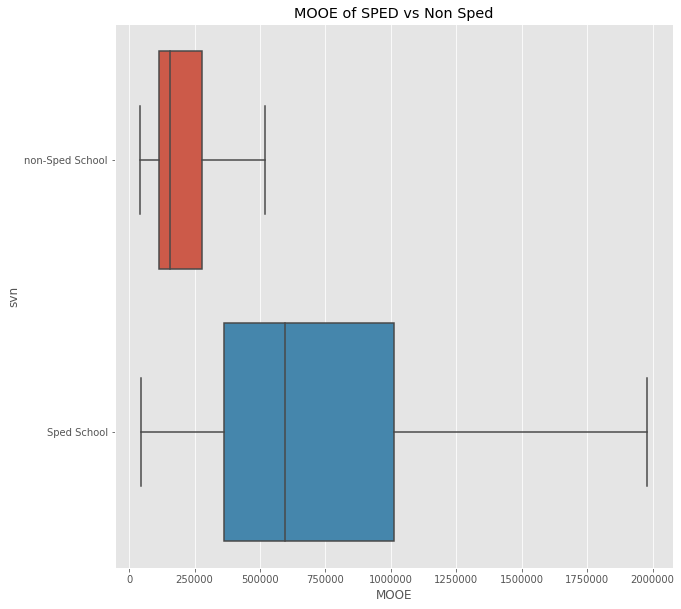

In [ ]:
svn = master_df
svn["svn"] = np.where(((mdf2["SPED NG Male"] > 0) & (mdf2["SPED NG Female"] > 0)), "Sped School","non-Sped School")

plt.figure(figsize=(10,10))

box = sns.boxplot(x=svn["MOOE"], y=svn["svn"], showfliers = False)
box.ticklabel_format(style='plain', axis='x') # turned off scientific notation
plt.title("MOOE of SPED vs Non Sped")
plt.show()

In [ ]:
# Side by side box plot 

mdf2 = master_df.copy()

In [ ]:
mdf2.columns

Index(['school.id', 'school.name', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'School ID_x', 'Kinder Male',
       'Kinder Female', 'Grade 1 Male', 'Grade 1 Female', 'Grade 2 Male',
       'Grade 2 Female', 'Grade 3 Male', 'Grade 3 Female', 'Grade 4 Male',
       'Grade 4 Female', 'Grade 5 Male', 'Grade 5 Female', 'Grade 6 Male',
       'Grade 6 Female', 'SPED NG Male', 'SPED NG Female', 'Grade 7 Male',
       'Grade 7 Female', 'Grade 8 Male', 'Grade 8 Female', 'Grade 9 Male',
       'Grade 9 Female', 'Grade 10 Male', 'Grade 10 Female', 'Grade 11 Male',
      

In [ ]:
mdf2['sped'] = np.where(((mdf2["SPED NG Male"] > 0) & (mdf2["SPED NG Female"] > 0)), 1,0)
mdf2['sped']

0        0
1        1
2        0
3        0
4        0
        ..
46598    0
46599    0
46600    0
46601    0
46602    0
Name: sped, Length: 46603, dtype: int64

Rowen you can try this: (make a column na may tag whether sped or not yung school, tas sns.boxplot, groupby the tag)

You can use the lambda function:



![Picture title](image-20210520-202034.png)

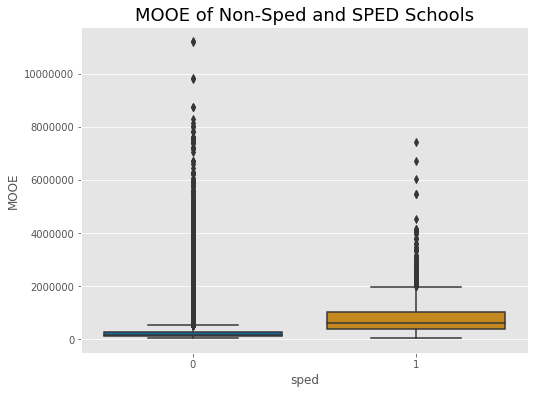

In [ ]:
plt.figure(figsize=(8,6))
spedbox = sns.boxplot(y='MOOE', x='sped', 
                 data=mdf2, 
                 palette="colorblind",
                 #hue='sped'
                 )

spedbox.ticklabel_format(style='plain', axis='y')
plt.title("MOOE of Non-Sped and SPED Schools").set_fontsize('18')
plt.show()

# wait guys sorry groupby only works with a Pandas Series dataframe, you use "hue" instead not groupby

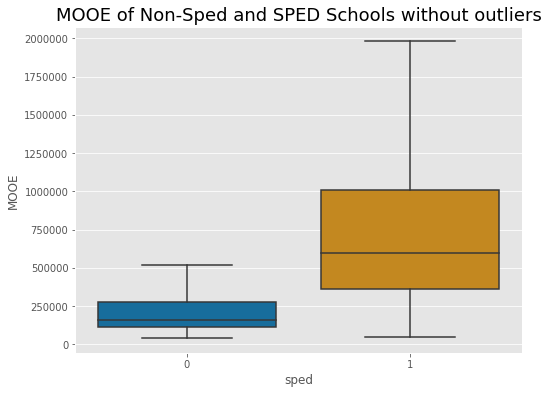

In [ ]:
plt.figure(figsize=(8,6))
spedbox = sns.boxplot(y='MOOE', x='sped', 
                 data=mdf2, 
                 palette="colorblind",
                 #hue='sped',
                 showfliers=False)

spedbox.ticklabel_format(style='plain', axis='y')
plt.title("MOOE of Non-Sped and SPED Schools without outliers").set_fontsize('18')
plt.show()

# wait guys sorry groupby only works with a Pandas Series dataframe, you use "hue" instead not groupby

# Model Training

## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6d87636b-43a9-448d-bfae-856d2b705cc3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>